In [1]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder
import imageio
from skimage import color
from skimage import io
import skimage.filters
import skimage.filters


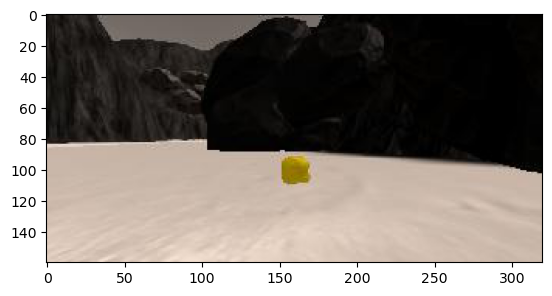

In [2]:
example_rock = '/home/hala/Projects/Rover_Project/Vision_Project_Startup_Code/calibration_images/example_rock1.jpg'
rock_img = mpimg.imread(example_rock)
plt.imshow(rock_img)

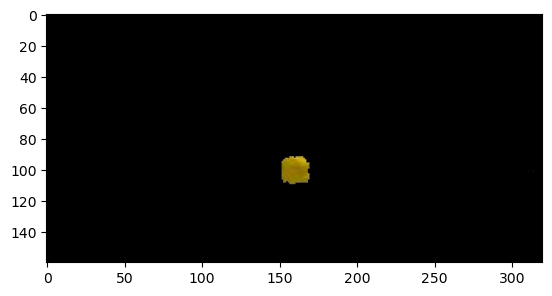

In [3]:
# detect the color of the rock in order to choose the appropriate threshold
# Lower and Higher boundaries of yellow color
# H -> 15-35, S -> 150-255, V -> 20-255
def detect_rock(rock_img):
    bgr_rock = cv2.cvtColor(rock_img,cv2.COLOR_RGB2BGR)
    hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
#def rock_hsv():
    lower  = np.array([15,150,20])
    upper = np.array([35,255,255])
    
    mask = cv2.inRange(hsv_rock,lower,upper)
  #  return mask

    detected_rock = cv2.bitwise_and(bgr_rock,bgr_rock,mask=mask)
    detected_rock_rgb = cv2.cvtColor(detected_rock,cv2.COLOR_BGR2RGB)
    return detected_rock_rgb
#cv2.imshow('rock',detected_rock)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
rock = detect_rock(rock_img) 
plt.imshow(rock)

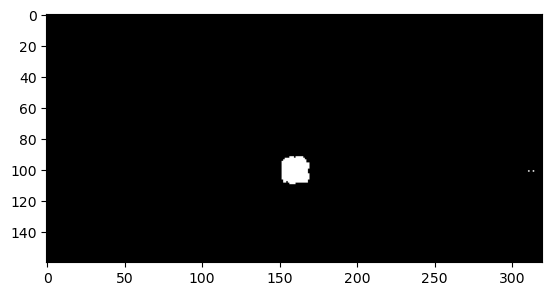

In [4]:
def rock_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                | (img[:,:,1] > rgb_thresh[1]) \
                | (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

threshed_rock = rock_thresh(rock)
plt.imshow(threshed_rock, cmap='gray')

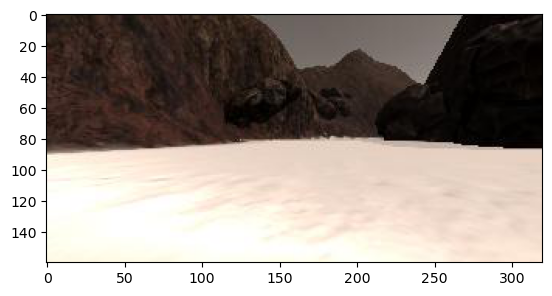

In [5]:
roadex ='/home/hala/Projects/Rover_Project/Vision_Project_Startup_Code/test_dataset/IMG/robocam_2017_05_02_11_16_21_499.jpg'
road_img = mpimg.imread(roadex)
plt.imshow(road_img)

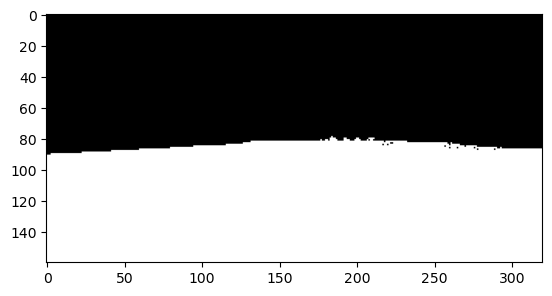

In [6]:
def ground_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

threshed_ground = ground_thresh(road_img)
plt.imshow(threshed_ground, cmap='gray')

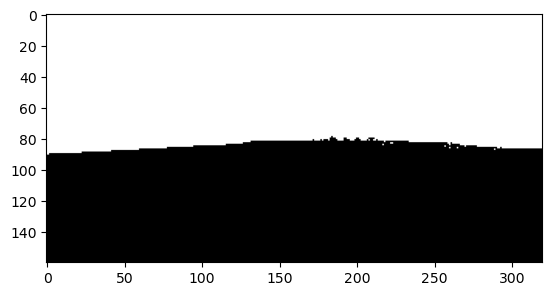

In [7]:
def obstacle_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    below_thresh = (img[:,:,0] < rgb_thresh[0]) \
                | (img[:,:,1] < rgb_thresh[1]) \
                | (img[:,:,2] < rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[below_thresh] = 1
    # Return the binary image
    return color_select

threshed_obstacle = obstacle_thresh(road_img)
plt.imshow(threshed_obstacle, cmap='gray')